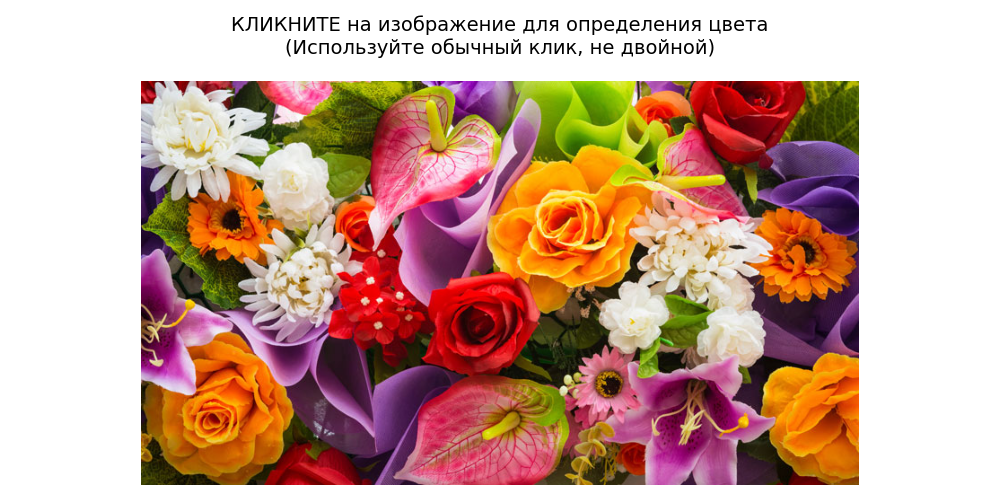

In [5]:
#для интерактивности фото
%matplotlib widget

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

img_path = 'flowers_color.jpg'  
csv_path = 'colors.csv'

#проверка существования файлов
import os
if not os.path.exists(img_path):
    print(f"Файл {img_path} не найден")
    exit()
if not os.path.exists(csv_path):
    print(f"Файл {csv_path} не найден")
    exit()

img = cv2.imread(img_path)
#преобразование цветов в rgb формат
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv(csv_path, names=index, header=None)

def getColorName(R, G, B):
    minimum = float('inf')
    cname = "Unknown till the end"
    for i in range(len(csv)):
        #расчет по формуле евклидового расстояния для большей точности
        d = ((R - int(csv.loc[i, "R"]))**2 + 
             (G - int(csv.loc[i, "G"]))**2 + 
             (B - int(csv.loc[i, "B"]))**2) ** 0.5
        if d < minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

current_color = None
current_position = None

#функция для обработки кликов (ОДИНОЧНЫЙ клик)
def onclick(event):
    global current_color, current_position
    
    if event.inaxes:  #условие клика внутри области изображения
        x, y = int(event.xdata), int(event.ydata)
        if 0 <= x < img.shape[1] and 0 <= y < img.shape[0]:
            r, g, b = img[y, x]
            color_name = getColorName(r, g, b)
            
            current_color = (r, g, b, color_name)
            current_position = (x, y)
        
            for artist in ax.artists:
                artist.remove()
            for text in ax.texts:
                text.remove()
        
            rect = plt.Rectangle((10, 10), 50, 30, facecolor=[r/255, g/255, b/255])
            ax.add_patch(rect)

            text_color = 'black' if (r + g + b) > 500 else 'white'
            ax.text(70, 25, f'{color_name}\nR:{r} G:{g} B:{b}', 
                   color=text_color, fontsize=12, weight='bold',
                   bbox=dict(facecolor='black', alpha=0.7))
            
            print(f"Цвет в точке ({x}, {y}): {color_name}")
            print(f"RGB: ({r}, {g}, {b})")
            print("-" * 50)
            
            fig.canvas.draw()

#графический интерфейс
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(img)
ax.set_title('КЛИКНИТЕ на изображение для определения цвета\n(Используйте обычный клик, не двойной)', 
            fontsize=14, pad=20)
ax.axis('off')

fig.canvas.mpl_connect('button_press_event', onclick)

plt.tight_layout()
plt.show()